
# Linear Regression

## **Imports**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [182]:
df= pd.read_csv("Regression_data.csv")

In [183]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [184]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


## Exploratory Data Analysis

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [188]:
df.isna().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [189]:
df.duplicated().sum()

0

<Axes: >

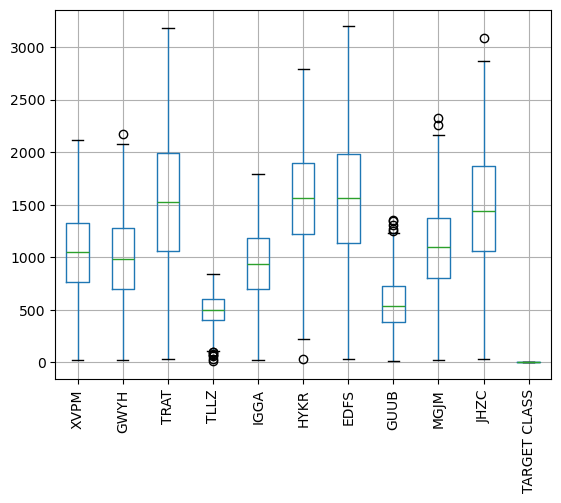

In [190]:
df.select_dtypes(include=np.number).boxplot(rot=90)

In [191]:
df.select_dtypes(include=np.number).corr()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


## Splitting the Feature Data and Label Data

In [193]:
X = df.select_dtypes(include=np.number)
X = X.drop('TARGET CLASS',axis=1)

In [194]:
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [195]:
Y = df['TARGET CLASS']

In [196]:
Y = pd.DataFrame(Y,columns=['TARGET CLASS'],index=df.index)

In [197]:
Y

,TARGET CLASS
0,0
1,1
2,1
3,0
4,0
...,...
995,0
996,1
997,1
998,1


## Feature Scailing

In [199]:
scaler = MinMaxScaler()

In [200]:
X_scaled = scaler.fit_transform(X)

In [201]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [202]:
X_scaled

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149
...,...,...,...,...,...,...,...,...,...,...
995,0.630724,0.589422,0.119277,0.668358,0.553794,0.322477,0.143269,0.488978,0.479401,0.685632
996,0.437859,0.521404,0.655697,0.567560,0.284398,0.605858,0.624388,0.388497,0.154955,0.175373
997,0.429818,0.272651,0.645983,0.584135,0.247596,0.560411,0.514291,0.129501,0.415673,0.625358
998,0.541981,0.270211,0.481866,0.763086,0.742398,0.516289,0.871167,0.402597,0.540349,0.425423


## Training and Testing Data

Spliting the data into training and testing sets.


In [204]:
X_scaled

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149
...,...,...,...,...,...,...,...,...,...,...
995,0.630724,0.589422,0.119277,0.668358,0.553794,0.322477,0.143269,0.488978,0.479401,0.685632
996,0.437859,0.521404,0.655697,0.567560,0.284398,0.605858,0.624388,0.388497,0.154955,0.175373
997,0.429818,0.272651,0.645983,0.584135,0.247596,0.560411,0.514291,0.129501,0.415673,0.625358
998,0.541981,0.270211,0.481866,0.763086,0.742398,0.516289,0.871167,0.402597,0.540349,0.425423


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=101)

## Training the Model

## Fitting the Regression Model:

In [208]:
lm = LinearRegression()

### **Fitting the Model**

In [210]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [212]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [[-0.17737919 -0.68010534  0.82118911 -0.29880553  0.51689087 -0.08310265
   0.49200595 -0.25176652 -0.13582254 -0.58730471]]
Intercept: 
 [0.65749208]


In [213]:
lm.score(X_scaled,Y)

0.48468170026962165

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [215]:
predictions = lm.predict( X_test)

In [216]:
predictions = pd.DataFrame(predictions,columns=Y.columns)

In [217]:
predictions

,TARGET CLASS
0,1.287620
1,0.572063
2,0.131224
3,0.934245
4,0.473528
...,...
295,0.647701
296,0.411972
297,0.177376
298,0.379707


** Create a scatterplot of the real test values versus the predicted values. **

In [219]:
predictions.isna().sum()

TARGET CLASS    0
dtype: int64

In [220]:
np.corrcoef(Y, predictions).shape

C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


(1300, 1300)

**Error**

In [222]:
error = Y - predictions

error.isna().sum()

TARGET CLASS    700
dtype: int64

In [223]:
print(Y.var(), predictions.var()) 

TARGET CLASS    0.25025
dtype: float64 TARGET CLASS    0.121789
dtype: float64


In [224]:
abs_error = np.abs(error)
mae = np.mean(abs_error) # mean absolute error
mae

0.5293625298992632

In [225]:
np.mean(np.abs(error / Y)) * 100

inf

In [226]:
sse = np.sum(error ** 2,axis=1)
sse

0      1.657965
1      0.183130
2      0.754772
3      0.872813
4      0.224228
         ...   
995    0.000000
996    0.000000
997    0.000000
998    0.000000
999    0.000000
Length: 1000, dtype: float64

In [227]:
sst = np.sum((Y - Y.mean())**2,axis=1)
sst

0      0.25
1      0.25
2      0.25
3      0.25
4      0.25
       ... 
995    0.25
996    0.25
997    0.25
998    0.25
999    0.25
Length: 1000, dtype: float64

In [228]:
1 - sse / sst

0     -5.631859
1      0.267480
2     -2.019089
3     -2.491253
4      0.103086
         ...   
995    1.000000
996    1.000000
997    1.000000
998    1.000000
999    1.000000
Length: 1000, dtype: float64

In [229]:
lm.intercept_ + lm.coef_ * 1.5

array([[ 0.3914233 , -0.36266593,  1.88927575,  0.20928378,  1.43282839,
         0.5328381 ,  1.395501  ,  0.27984229,  0.45375827, -0.22346499]])

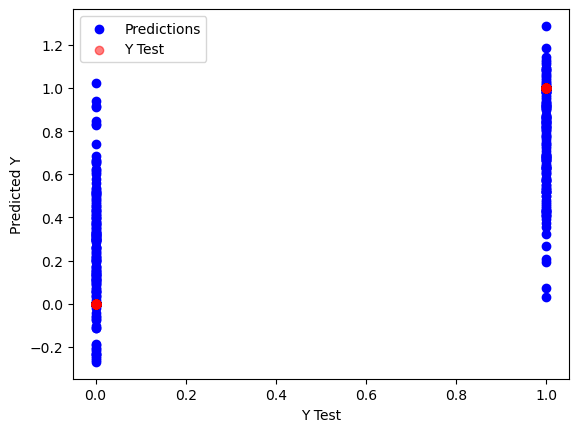

In [230]:
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Y Test')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend()

## Prediction Using OLS Method

In [232]:
import statsmodels.api as sm
X_11 = sm.add_constant(X_scaled)

In [233]:
X_11

,const,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,1.0,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,1.0,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,1.0,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,1.0,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.630724,0.589422,0.119277,0.668358,0.553794,0.322477,0.143269,0.488978,0.479401,0.685632
996,1.0,0.437859,0.521404,0.655697,0.567560,0.284398,0.605858,0.624388,0.388497,0.154955,0.175373
997,1.0,0.429818,0.272651,0.645983,0.584135,0.247596,0.560411,0.514291,0.129501,0.415673,0.625358
998,1.0,0.541981,0.270211,0.481866,0.763086,0.742398,0.516289,0.871167,0.402597,0.540349,0.425423


In [234]:
model = sm.OLS(Y,X_11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TARGET CLASS   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     93.62
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.27e-135
Time:                        01:46:13   Log-Likelihood:                -392.74
No. Observations:                1000   AIC:                             807.5
Df Residuals:                     989   BIC:                             861.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      0.097      6.151      0.000       0.406       0.786
XVPM          -0.1711      0.065     -2.649      0.008      -0.298      -0.044
GWYH          -0.7140      0.065    -10.951      0.000      -0.842      -0.586
TRAT           0.8550      0.059     14.609      0.000       0.740       0.970
TLLZ          -0.2602      0.068     -3.830      0.000      -0.393      -0.127
IGGA           0.4961      0.059      8.362      0.000       0.380       0.613
HYKR          -0.0147      0.064     -0.230      0.818      -0.140       0.111
EDFS           0.4655      0.061      7.607      0.000       0.345       0.586
GUUB          -0.2514      0.062     -4.042      0.000      -0.373      -0.129
MGJM          -0.1500      0.066     -2.289      0.022      -0.279      -0.021
JHZC          -0.5317      0.062     -8.539      0.000      -0.654      -0.410
==============================================================================
Omnibus:                        4.868   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.029
Skew:                          -0.062   Prob(JB):                        0.133
Kurtosis:                       2.715   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Model
Calculating R^2 and MSE 


In [236]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.29744230085356804
MSE: 0.1345163526015053
RMSE: 0.3667647101364924


In [237]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.46183891651247


# KNN Regression

In [239]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [240]:
K=3
model = KNeighborsRegressor(n_neighbors = K)

In [241]:
model.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=3)

In [242]:
prediction1=model.predict(X_test)

In [243]:
prediction1.shape

(300, 1)

In [244]:
y_test.shape

(300, 1)

In [245]:
error = np.sqrt(mean_squared_error(y_test,prediction1))

In [246]:
error

0.41231056256176607

In [247]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 0.41231056256176607
MSE value for k=  3 is: 0.17


## Choosing the best k

In [249]:
error_rate=[]
for i in range(1,15):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

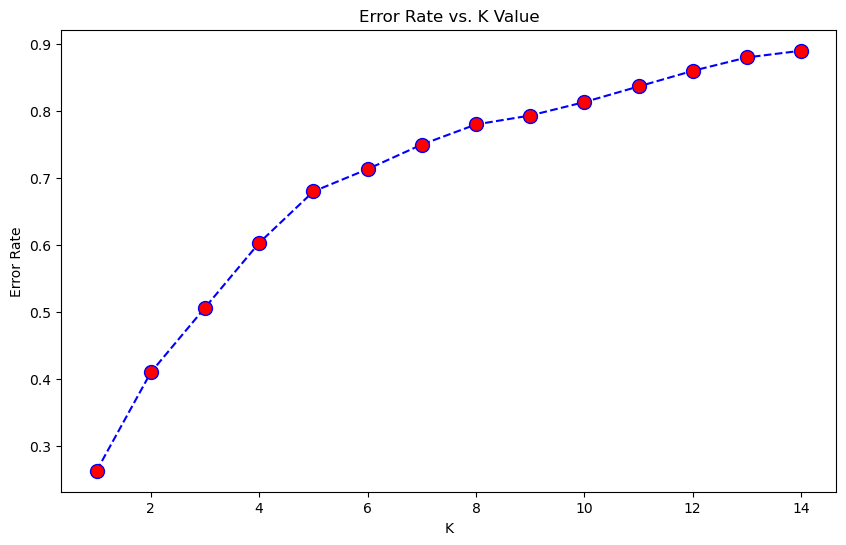

In [250]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Inference**:
- The error rate remains constant around 1.00 regardless of the k-value, which suggests that changing k doesn't significantly affect the model's performance.

## Model Evaluation

In [253]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 0.41231056256176607
MSE value for k=  3 is: 0.17


In [254]:
r2 = r2_score(y_test, prediction1)
print(f'R2 is : {r2}')


R2 is : 0.3198790896159318


# Decision Tree

In [256]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# method 1 to visualize decision tree
from sklearn.tree import export_graphviz

# method 2 to visualize decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [257]:
dtr = DecisionTreeRegressor(random_state=42)

In [258]:
model = dtr.fit(X_train,y_train)

In [259]:
export_graphviz(model, out_file ='tree.dot',feature_names =X_train.columns)

[Text(0.4564189189189189, 0.96875, 'TRAT <= 0.424\nsquared_error = 0.25\nsamples = 700\nvalue = 0.503'),
 Text(0.16013513513513514, 0.90625, 'GWYH <= 0.313\nsquared_error = 0.183\nsamples = 294\nvalue = 0.241'),
 Text(0.06486486486486487, 0.84375, 'JHZC <= 0.637\nsquared_error = 0.23\nsamples = 50\nvalue = 0.64'),
 Text(0.05405405405405406, 0.78125, 'IGGA <= 0.443\nsquared_error = 0.198\nsamples = 44\nvalue = 0.727'),
 Text(0.032432432432432434, 0.71875, 'GWYH <= 0.288\nsquared_error = 0.222\nsamples = 12\nvalue = 0.333'),
 Text(0.021621621621621623, 0.65625, 'HYKR <= 0.287\nsquared_error = 0.099\nsamples = 9\nvalue = 0.111'),
 Text(0.010810810810810811, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.032432432432432434, 0.59375, 'squared_error = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(0.043243243243243246, 0.65625, 'squared_error = 0.0\nsamples = 3\nvalue = 1.0'),
 Text(0.07567567567567568, 0.71875, 'TLLZ <= 0.744\nsquared_error = 0.109\nsamples = 32\nvalue = 0.875')

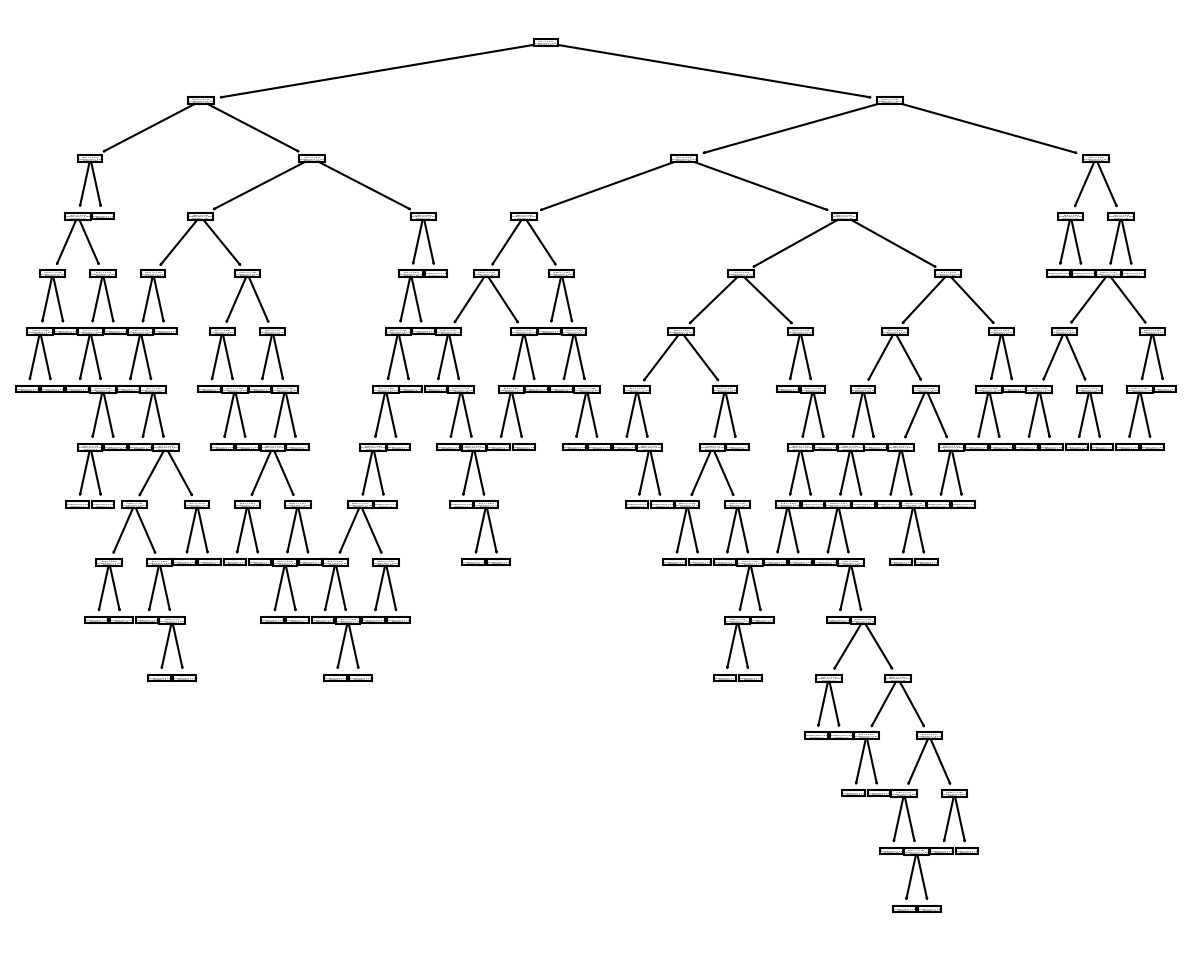

In [260]:
feature_names =X_train.columns
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=feature_names)

In [261]:
predictions2 = model.predict(X_test)

In [262]:
predictions

,TARGET CLASS
0,1.287620
1,0.572063
2,0.131224
3,0.934245
4,0.473528
...,...
295,0.647701
296,0.411972
297,0.177376
298,0.379707


## Evaluation of Model

In [264]:
mse = mean_squared_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

Mean Squared Error: 0.31666666666666665
R²: -0.26689189189189166


 a negative R² indicates that the model is not fitting the data well and that the predictions are significantly off. It suggests that the model is a poor choice for the given dataset.